<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Binary_Classification/Binary_Classification(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanthMeenan/project_session2/master/Enrollment_Data.csv')
df.head()

,avg_income,CAMPUS_VISIT,CAMPUS_VISIT_2,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,Target_Enroll,ETHNICITY,...,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
0,NaN,0,0,EML,1,Sep,2012,NaN,0,NaN,...,0,0,NaN,1,1.0,0,NaN,N,1,0
1,NaN,0,0,SAT,12,Feb,2014,NaN,0,N,...,0,0,NaN,1,1.0,0,NaN,N,1,0
2,NaN,0,0,C01,16,Jan,2015,NaN,0,C,...,0,0,NaN,0,1.0,1,NaN,N,1,0
3,NaN,0,0,EML,11,Mar,2015,NaN,0,NaN,...,0,0,NaN,1,0.0,0,NaN,N,1,0
4,NaN,0,0,TFL,28,Mar,2015,NaN,0,B,...,0,0,1090.0,2,1.0,0,NaN,N,2,0


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,avg_income,CAMPUS_VISIT,CAMPUS_VISIT_2,CONTACT_CODE1,Contact_Date,Contact_Month,Contact_Year,distance,Target_Enroll,ETHNICITY,hscrat,ID,init_span,Instate,int1rat,int2rat,interest,IRSCHOOL,LEVEL_YEAR,mailq,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TERRITORY,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
0,NaN,0,0,EML,1,Sep,2012,NaN,0,NaN,0.037652,32,48,N,0.017183,0.02038,0,NaN,FR04,5,0,0,NaN,1,1.0,0,NaN,N,1,0
1,NaN,0,0,SAT,12,Feb,2014,NaN,0,N,0.037652,51,31,N,0.017183,0.02038,0,NaN,FR04,5,0,0,NaN,1,1.0,0,NaN,N,1,0
2,NaN,0,0,C01,16,Jan,2015,NaN,0,C,0.037652,120,20,N,0.017183,0.02038,0,NaN,FR04,5,0,0,NaN,0,1.0,1,NaN,N,1,0
3,NaN,0,0,EML,11,Mar,2015,NaN,0,NaN,0.037652,151,18,N,0.017183,0.02038,0,NaN,FR04,5,0,0,NaN,1,0.0,0,NaN,N,1,0
4,NaN,0,0,TFL,28,Mar,2015,NaN,0,B,0.037652,160,18,N,0.017183,0.02038,0,NaN,FR04,5,0,0,1090.0,2,1.0,0,NaN,N,2,0


In [5]:
df.columns

Index(['avg_income', 'CAMPUS_VISIT', 'CAMPUS_VISIT_2', 'CONTACT_CODE1',
       'Contact_Date', 'Contact_Month', 'Contact_Year', 'distance',
       'Target_Enroll', 'ETHNICITY', 'hscrat', 'ID', 'init_span', 'Instate',
       'int1rat', 'int2rat', 'interest', 'IRSCHOOL', 'LEVEL_YEAR', 'mailq',
       'premiere', 'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex',
       'SOLICITED_CNTCTS', 'telecq', 'TERRITORY', 'TOTAL_CONTACTS',
       'TRAVEL_INIT_CNTCTS'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_income          4397 non-null   float64
 1   CAMPUS_VISIT        5160 non-null   int64  
 2   CAMPUS_VISIT_2      5160 non-null   object 
 3   CONTACT_CODE1       5155 non-null   object 
 4   Contact_Date        5160 non-null   int64  
 5   Contact_Month       5160 non-null   object 
 6   Contact_Year        5160 non-null   int64  
 7   distance            4489 non-null   float64
 8   Target_Enroll       5160 non-null   int64  
 9   ETHNICITY           4562 non-null   object 
 10  hscrat              5160 non-null   float64
 11  ID                  5160 non-null   int64  
 12  init_span           5160 non-null   int64  
 13  Instate             5160 non-null   object 
 14  int1rat             5160 non-null   float64
 15  int2rat             5160 non-null   float64
 16  intere

In [7]:
df.describe()

,avg_income,CAMPUS_VISIT,Contact_Date,Contact_Year,distance,Target_Enroll,hscrat,ID,init_span,int1rat,int2rat,interest,mailq,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
count,4397.000000,5160.000000,5160.000000,5160.000000,4489.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,3273.000000,5160.000000,5033.000000,5160.000000,2105.000000,5160.000000,5160.000000
mean,53494.747100,0.150194,15.707558,2014.610659,318.016140,0.500000,0.088590,44615.840891,19.215891,0.045520,0.051802,0.172093,3.893798,0.212984,0.064147,1149.364497,3.335659,0.617524,0.582946,2.141568,4.429651,0.446899
std,23083.609393,0.374771,8.799722,0.723275,370.781848,0.500048,0.145744,22348.233655,9.177806,0.035887,0.039164,0.411876,1.600167,0.409456,0.288625,151.491442,3.098895,0.486040,0.761358,0.807467,3.480081,0.670228
min,9783.000000,0.000000,1.000000,2010.000000,0.790555,0.000000,0.000000,32.000000,-216.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,440.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,35568.000000,0.000000,7.000000,2014.000000,102.461358,0.000000,0.023529,28248.750000,12.000000,0.020906,0.020380,0.000000,2.000000,0.000000,0.000000,1050.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,48627.000000,0.000000,16.000000,2015.000000,160.271705,0.500000,0.052632,45814.000000,18.000000,0.049270,0.056670,0.000000,5.000000,0.000000,0.000000,1150.000000,3.000000,1.000000,0.000000,2.000000,3.000000,0.000000
75%,68458.000000,0.000000,23.000000,2015.000000,372.547430,1.000000,0.095238,62830.250000,23.000000,0.049270,0.056670,0.000000,5.000000,0.000000,0.000000,1250.000000,5.000000,1.000000,1.000000,2.000000,7.000000,1.000000
max,200001.000000,2.000000,31.000000,2016.000000,3882.192379,1.000000,1.000000,82327.000000,72.000000,1.000000,1.000000,3.000000,5.000000,1.000000,5.000000,1600.000000,21.000000,1.000000,9.000000,4.000000,28.000000,5.000000


**DATA CLEANING**

In [8]:
df.columns

Index(['avg_income', 'CAMPUS_VISIT', 'CAMPUS_VISIT_2', 'CONTACT_CODE1',
       'Contact_Date', 'Contact_Month', 'Contact_Year', 'distance',
       'Target_Enroll', 'ETHNICITY', 'hscrat', 'ID', 'init_span', 'Instate',
       'int1rat', 'int2rat', 'interest', 'IRSCHOOL', 'LEVEL_YEAR', 'mailq',
       'premiere', 'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex',
       'SOLICITED_CNTCTS', 'telecq', 'TERRITORY', 'TOTAL_CONTACTS',
       'TRAVEL_INIT_CNTCTS'],
      dtype='object')

In [9]:
df['CAMPUS_VISIT'].value_counts(normalize=True)*100   #To display in percent values

0    85.620155
1    13.740310
2     0.639535
Name: CAMPUS_VISIT, dtype: float64

In [10]:
df['LEVEL_YEAR'].value_counts()  #can be removed

FR04    5160
Name: LEVEL_YEAR, dtype: int64

> We can remove this column as it won't be having any impact on the output as for all values this is same

In [11]:
df['ID'].value_counts() #also can be removed

32       1
58175    1
57858    1
57854    1
57836    1
        ..
34381    1
34372    1
34368    1
34363    1
82327    1
Name: ID, Length: 5160, dtype: int64

In [12]:
df['Instate'].value_counts()

Y    3701
N    1459
Name: Instate, dtype: int64

In [13]:
df['Contact_Month'].value_counts()

Feb    785
Oct    687
Mar    602
Nov    512
Dec    491
Jul    394
Jan    392
Apr    388
Sep    359
May    215
Jun    192
Aug    143
Name: Contact_Month, dtype: int64

In [14]:
df['TERRITORY'].value_counts()

5    661
2    649
3    644
7    628
4    608
6    608
1    597
8    529
A    134
N    101
0      1
Name: TERRITORY, dtype: int64

> 0 has only 1 entry, can be substituted or 0 entry can be removed

In [15]:
df['IRSCHOOL'].value_counts(normalize=True)

447290    0.009081
445573    0.006969
440324    0.006969
443509    0.006969
441471    0.006758
            ...   
371109    0.000211
370112    0.000211
372069    0.000211
372070    0.000211
442235    0.000211
Name: IRSCHOOL, Length: 1767, dtype: float64

> Too many unique values, so it is not important as it won't have impact on the output.

In [16]:
df1 = df.drop(['IRSCHOOL', 'TERRITORY', 'Contact_Date', 'CAMPUS_VISIT_2', 'LEVEL_YEAR', 'ID'], axis=1)

In [17]:
df1.shape

(5160, 24)

In [18]:
for col in df1.columns:
  if df1[col].dtypes == int or df1[col].dtypes == float:
    #can be replaced by mean or mode
    df2 = df1[col]
    df2 = df2.dropna()

    if(abs(np.mean(df2)-np.median(df2))) <= np.std(df2):
      df1[col].fillna(np.mean(df2), inplace=True) #if data fulfills normal distribution or there are no outliers, then we can replace by mean value otherwise median
    else:
      df1[col].fillna(np.median(df2), inplace=True)

In [19]:
for col in df1.columns:
  if df1[col].dtypes == str or df1[col].dtypes==object:
    df3 = df1[col]
    df3.dropna()

    uniq_val = list(df3.unique())
    if len(uniq_val) <= 10:
      total_count = 0
      val = str
      for v in uniq_val:
        if v!= 'nan':
          count=df3.loc[df3==v]
          count = int(count.shape[0])

          if count >= total_count:
            total_count = count
            val = v
      df1[col].fillna(val, inplace=True)
    else:
      df1 = df1.drop(col, axis=1)
      print("Dropped: ", col)

Dropped:  CONTACT_CODE1
Dropped:  Contact_Month


In [20]:
df1.shape

(5160, 22)

In [21]:
df4 = df1
shape = df1.shape
for c in df4.columns:
  if df4[c].dtypes == object or df4[c].dtypes == str:
    l = list(df4[c].unique())

    for v in l:
      df1[str(c)+str(v)] = None
      for i in range(shape[0]):
        if df1[c][i] == v:
          df1[str(c)+str(v)][i] = 1
        else:
          df1[str(c)+str(v)][i] = 0
    df1 = df1.drop(c,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [22]:
# Normalisation
for col in df1.columns:
  if col!='Target_Enroll' and (df1[col].dtypes==int or df1[col].dtypes==float) :
    mean = np.mean(df1[col])
    max_val = np.max(df1[col])
    min_val = np.min(df1[col])

    df1[col] = pd.DataFrame(map(lambda x: abs(x-mean)/(max_val-min_val), df1[col]))

In [23]:
df1.head()

,avg_income,CAMPUS_VISIT,Contact_Year,distance,Target_Enroll,hscrat,init_span,int1rat,int2rat,interest,mailq,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS,ETHNICITYC,ETHNICITYN,ETHNICITYB,ETHNICITYH,ETHNICITYA,ETHNICITYO,ETHNICITYI,InstateN,InstateY
0,1.147519e-15,0.075097,0.435110,1.361992e-15,0,0.050938,0.099945,0.028338,0.031422,0.057364,0.27655,0.212984,0.012829,1.372083e-14,0.111222,0.382476,0.064772,2.753353e-14,0.127024,0.08938,1,0,0,0,0,0,0,1,0
1,1.147519e-15,0.075097,0.101776,1.361992e-15,0,0.050938,0.040917,0.028338,0.031422,0.057364,0.27655,0.212984,0.012829,1.372083e-14,0.111222,0.382476,0.064772,2.753353e-14,0.127024,0.08938,0,1,0,0,0,0,0,1,0
2,1.147519e-15,0.075097,0.064890,1.361992e-15,0,0.050938,0.002723,0.028338,0.031422,0.057364,0.27655,0.212984,0.012829,1.372083e-14,0.158841,0.382476,0.046339,2.753353e-14,0.127024,0.08938,1,0,0,0,0,0,0,1,0
3,1.147519e-15,0.075097,0.064890,1.361992e-15,0,0.050938,0.004222,0.028338,0.031422,0.057364,0.27655,0.212984,0.012829,1.372083e-14,0.111222,0.617524,0.064772,2.753353e-14,0.127024,0.08938,1,0,0,0,0,0,0,1,0
4,1.147519e-15,0.075097,0.064890,1.361992e-15,0,0.050938,0.004222,0.028338,0.031422,0.057364,0.27655,0.212984,0.012829,5.117629e-02,0.063603,0.382476,0.064772,2.753353e-14,0.089987,0.08938,0,0,1,0,0,0,0,1,0


In [24]:
df1.dropna(inplace=True)

In [25]:
df1.shape

(5160, 29)

In [26]:
# df4 = df1
# shape = df1.shape

# for col in df4.columns:
#   if df4[col].dtypes==object or df4[col].dtypes==str:
#     list1 = list(df4[col].unique())
#     for val in list1:
#       df1[str(col) + str(val)] = None

#       for i in range(df1.shape[0]):
#         if df1[col][i] == val:
#           df1[str(col) + str(val)][i] = 1
#         else:
#           df1[str(col) + str(val)][i] = 0
#     df1 = df1.drop(col, axis=1)

In [ ]:
df1.drop(['ETHNICITYH', 'InstateY'], inplace=True, axis=1)  #In one hot encoding last column is not required as if all other columns are 0, that automatically means the last column is 1.

In [33]:
new_df = df1

**Train-Test Split**

In [35]:
Y = new_df['Target_Enroll']
X = new_df.drop('Target_Enroll', axis=1)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [45]:
hyper_params = []
f1_Scores = []
lgr_best_score = 0
lgr_best_solver = str
lgr_best_c = 0
lgr_best_penalty = str
kFolds = 5

In [46]:
for s in range(len(solver)):
    for p in range(len(penalty)):
        for c in range(len(C)):
            
            if solver[s] == 'newton-cg' or 'lbfgs':
                
                if penalty[p] != 'l1':
                    
                    lgr = LogisticRegression(penalty = penalty[p] , C = C[c],  solver = solver[s], max_iter = 100)
                    y_pred = cross_val_predict(lgr, x_train, y_train, cv = kFolds)
                    F1_score = f1_score(y_train, y_pred)
                    c_matrix = confusion_matrix(y_train, y_pred)
                    hyper_params.append([solver[s],penalty[p] , C[c]]) 
                    f1_Scores.append(F1_score)
                    
                    if F1_score >= lgr_best_score:
                        lgr_best_score = F1_score
                        lgr_best_solver = solver[s]
                        lgr_best_c = C[c]
                        lgr_best_penalty = penalty[p] 
                        
            else:
                

                lgr = LogisticRegression(penalty = penalty[p] , C = C[c],  solver = solver[s], max_iter = 100)
                y_pred = cross_val_predict(lgr, x_train, y_train, cv = kFolds)
                F1_score = f1_score(y_train, y_pred)
                c_matrix = confusion_matrix(y_train, y_pred)
                hyper_params.append([solver[s],penalty[p] , C[c]]) 
                f1_Scores.append(F1_score)
                    
                if F1_score >= lgr_best_score:
                    lgr_best_score = F1_score
                    lgr_best_solver = solver[s]
                    lgr_best_c = C[c]
                    lgr_best_penalty = penalty[p] 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [47]:
hyper_params

[['newton-cg', 'l2', 0.0001],
 ['newton-cg', 'l2', 0.001],
 ['newton-cg', 'l2', 0.01],
 ['newton-cg', 'l2', 0.1],
 ['newton-cg', 'l2', 1],
 ['newton-cg', 'l2', 10],
 ['newton-cg', 'l2', 100],
 ['lbfgs', 'l2', 0.0001],
 ['lbfgs', 'l2', 0.001],
 ['lbfgs', 'l2', 0.01],
 ['lbfgs', 'l2', 0.1],
 ['lbfgs', 'l2', 1],
 ['lbfgs', 'l2', 10],
 ['lbfgs', 'l2', 100],
 ['liblinear', 'l2', 0.0001],
 ['liblinear', 'l2', 0.001],
 ['liblinear', 'l2', 0.01],
 ['liblinear', 'l2', 0.1],
 ['liblinear', 'l2', 1],
 ['liblinear', 'l2', 10],
 ['liblinear', 'l2', 100],
 ['sag', 'l2', 0.0001],
 ['sag', 'l2', 0.001],
 ['sag', 'l2', 0.01],
 ['sag', 'l2', 0.1],
 ['sag', 'l2', 1],
 ['sag', 'l2', 10],
 ['sag', 'l2', 100],
 ['saga', 'l2', 0.0001],
 ['saga', 'l2', 0.001],
 ['saga', 'l2', 0.01],
 ['saga', 'l2', 0.1],
 ['saga', 'l2', 1],
 ['saga', 'l2', 10],
 ['saga', 'l2', 100]]

In [48]:
f1_Scores 

[0.685306811784575,
 0.7245720040281974,
 0.730532786885246,
 0.809285924184543,
 0.8265364732912119,
 0.8312056737588652,
 0.8342276193165773,
 0.685306811784575,
 0.7245720040281974,
 0.730532786885246,
 0.809285924184543,
 0.8265364732912119,
 0.8312056737588652,
 0.8338983050847457,
 0.7173473513950667,
 0.7452851624630765,
 0.7260340632603406,
 0.8099941894247531,
 0.8277046365197481,
 0.8308740068104428,
 0.8338983050847457,
 0.685306811784575,
 0.7240684793554885,
 0.730532786885246,
 0.809285924184543,
 0.8265364732912119,
 0.8312056737588652,
 0.8338983050847457,
 0.685306811784575,
 0.7245720040281974,
 0.730532786885246,
 0.809285924184543,
 0.8265364732912119,
 0.8312056737588652,
 0.8335688047471036]

In [49]:
m = [23.34, 23.12, 23.04, 23.31, 23.23, 23.76,23.99,  23.9]
max(m)

23.99

In [50]:
m.index(max(m))

6

In [51]:
f1_Scores.index(max(f1_Scores))

6

In [52]:
hyper_params[3]

['newton-cg', 'l2', 0.1]

In [53]:
lgr_best_score

0.8342276193165773

In [54]:
lgr_best_solver

'newton-cg'

In [55]:
lgr_best_c

100

In [56]:
lgr_best_penalty

'l2'

In [57]:
best_lgr = LogisticRegression(penalty = lgr_best_penalty, C = lgr_best_c, solver = lgr_best_solver, max_iter=5000)
best_lgr.fit(x_train, y_train)

LogisticRegression(C=100, max_iter=5000, solver='newton-cg')

In [58]:
y_train_predictions = best_lgr.predict(x_train)

In [59]:
score = f1_score(y_train, y_train_predictions)
score

0.8380898558914947

Text(0, 0.5, 'Y: Predictions')

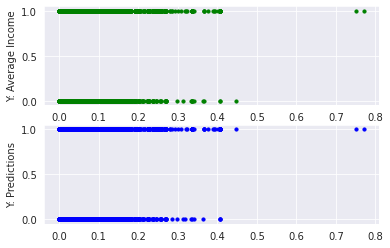

In [60]:
plt.subplot(2,1,1)
plt.scatter(x_train['avg_income'], y_train, color = 'g', s=10)
plt.ylabel('Y: Average Income')

plt.subplot(2,1,2)
plt.scatter(x_train['avg_income'], y_train_predictions, color = 'b', s=10)
plt.ylabel('Y: Predictions')